In [1]:
import numpy as np
import pandas as pd
import rasterio as rio
#import geopandas as gpd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os

In [719]:
### load data
X = pd.read_csv('scaled_X.csv',header=0,index_col=0)
y = pd.read_csv('scaled_y.csv',header=0,index_col=0)
data = pd.read_csv('all_bedrock.csv',index_col=0)


In [720]:
data

,Citation,Sample ID,Location,Latitude,Longitude,Elevation m,Relief meters,Rock Type specific,Rock Type general,Sample Thickness cm,...,Climate Zone main,Climate Zone sub-category,Original 10Be Concentration_at g-1,Original 10Be Concentration Error_at g-1,AMS Standard,Published Erosion Rate (m My-1)g,Published Erosion Rate Error (m My-1)g,CRONUS Erosion Rate_m My-1,CRONUS Erosion Rate Error_m My-1,Percent Difference between Published and CRONUS Erosion Rates
0,Albrecht et al. (1993)h,S01,"Pajarito Plateau, Valles Caldera Region, New M...",35.834566,-106.371692,2483.0,1042.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,1880000.0,0.0,KNSTD,NaN,NaN,6.480,0.54,NaN
1,NaN,S02,NaN,35.792952,-106.271056,2020.0,567.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2750000.0,0.0,KNSTD,NaN,NaN,4.270,0.37,NaN
2,NaN,S03,NaN,35.787481,-106.244529,1971.0,499.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2755000.0,0.0,KNSTD,NaN,NaN,4.275,0.37,NaN
3,NaN,S03,NaN,35.787481,-106.244529,1971.0,499.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2910000.0,0.0,KNSTD,NaN,NaN,4.010,0.35,NaN
4,NaN,S03r,NaN,35.787481,-106.244529,1971.0,499.0,Welded Tuff,Igneous,3.0,...,Cold,Warm summer without dry season,2600000.0,0.0,KNSTD,NaN,NaN,4.540,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,NaN,BM-7,NaN,-33.405067,150.173246,1124.0,281.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,549000.0,34000.0,NIST_30000,9.8,0.7,12.690,1.27,29.489796
526,NaN,BM-9,NaN,-33.404839,150.173625,1124.0,281.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,548000.0,24000.0,NIST_30000,9.9,0.5,12.720,1.13,28.484848
527,NaN,BM-11,"Mt. York, Blue Mountains, Australia",-33.552444,150.221720,1037.0,434.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,403000.0,25000.0,NIST_30000,12.6,1.0,16.780,1.65,33.174603
528,NaN,JC-12,"Marrangaroo Creek, Blue Mountains, Australia",-33.413136,150.165956,1074.0,290.0,Sandstone,Sedimentary,3.0,...,Temperate,Warm summer without dry season,167000.0,12000.0,NIST_30000,26.8,2.1,38.500,3.87,43.656716


In [ ]:
data.columns

for i in data.columns[3:]:
    plt.figure(figsize = (10,10))
    sns.histplot(data[i])
    #plt.title = i
    plt.show()
    #break

In [1]:
import umap
import matplotlib.pyplot as plt
reducer = umap.UMAP()
embedding = reducer.fit_transform(X,y)
plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],
                hue=data['Climate Zone sub-category'], palette='deep',
                size=data['Mean Annual Precipitation mm yr-1'], sizes=(10, 200))

NameError: name 'X' is not defined

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

In [32]:
X = X.to_numpy()
y = y.to_numpy()

X = X.reshape((X.shape[0], -1))
y = y.reshape((y.shape[0], -1))

(530, 1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from umap.parametric_umap import ParametricUMAP

embedder = ParametricUMAP(n_epochs = 2000, verbose=True)
embedding = embedder.fit_transform(X,y)



/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa252491430>)
Fri Dec 16 16:31:56 2022 Construct fuzzy simplicial set
Fri Dec 16 16:31:56 2022 Finding Nearest Neighbors
Fri Dec 16 16:31:58 2022 Finished Nearest Neighbor Search
Fri Dec 16 16:31:58 2022 Construct embedding
Epoch 1/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.2288
Epoch 2/10
1546/1546 [==============================] - 5s 4ms/step - loss: 0.1411
Epoch 3/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.1391
Epoch 4/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.1369
Epoch 5/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.1361
Epoch 6/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.1364
Epoch 7/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.1360
Epoch 8/10
1546/1546 [==============================] - 3s 2ms/step - loss: 0.1347
Epoch 9/10
1546/1546 [====

<AxesSubplot:>

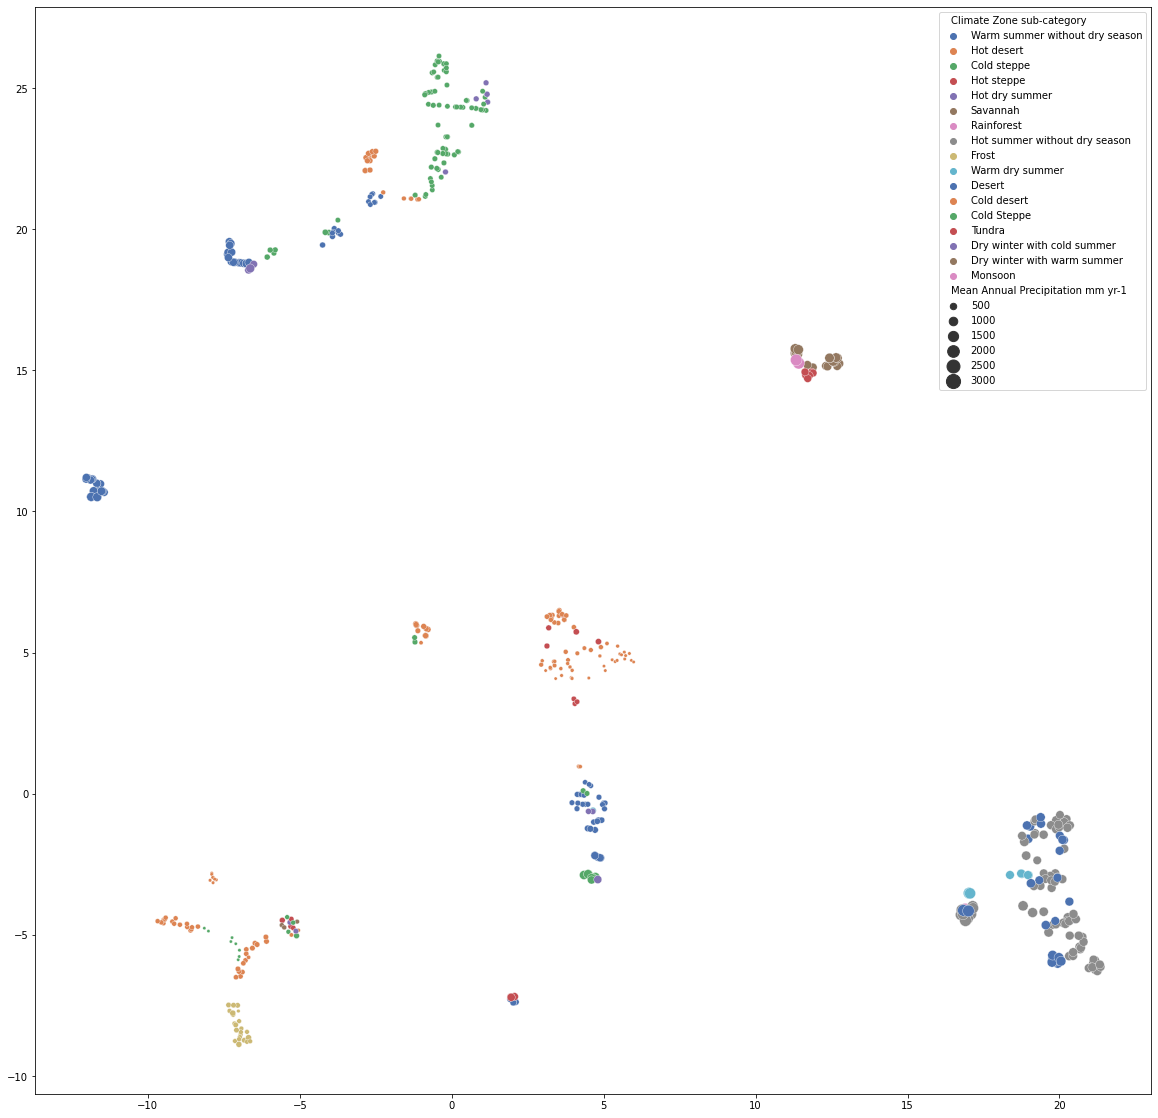

In [36]:
plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],
                hue=data['Climate Zone sub-category'], palette='deep',
                size=data['Mean Annual Precipitation mm yr-1'], sizes=(10, 200))
               

Text(0.5, 0, 'Epoch')

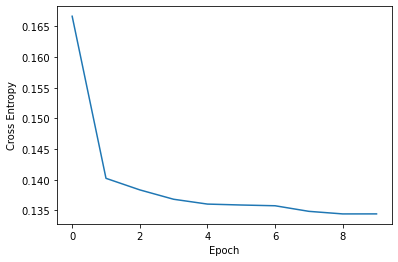

In [37]:
embedder._history.keys()
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')


In [721]:
from umap.parametric_umap import ParametricUMAP

train_images.shape

(60000, 784)

In [39]:
X_train.shape

(397, 9)

In [42]:
import tensorflow as tf
dims = (3,3, 1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=128, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 2, 2, 64)          640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 404,226
Trainable params: 404,226
Non-trainable params: 0
________________________________________________

In [93]:
embedder = ParametricUMAP(encoder=encoder, 
                          dims=dims, 
                          n_components=n_components, 
                          n_training_epochs=2,  # epochs * 10 
                          n_epochs = 5000,
                          verbose=True)

/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


In [94]:
embedding = embedder.fit_transform(X, y)

ParametricUMAP(dims=(3, 3, 1), encoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa278231280>, n_training_epochs=2, optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2528289a0>)
Fri Dec 16 17:23:59 2022 Construct fuzzy simplicial set
Fri Dec 16 17:24:00 2022 Finding Nearest Neighbors
Fri Dec 16 17:24:00 2022 Finished Nearest Neighbor Search
Fri Dec 16 17:24:00 2022 Construct embedding
Epoch 1/20
3868/3868 [==============================] - 13s 3ms/step - loss: 0.1333
Epoch 2/20
3868/3868 [==============================] - 13s 3ms/step - loss: 0.1328
Epoch 3/20
3868/3868 [==============================] - 13s 3ms/step - loss: 0.1320
Epoch 4/20
3868/3868 [==============================] - 13s 3ms/step - loss: 0.1323
Epoch 5/20
3868/3868 [==============================] - 14s 4ms/step - loss: 0.1312
Epoch 6/20
3868/3868 [==============================] - 13s 3ms/step - loss: 0.1315
Epoch 7/20
3868/3868 [==============================] - 14s 

<AxesSubplot:>

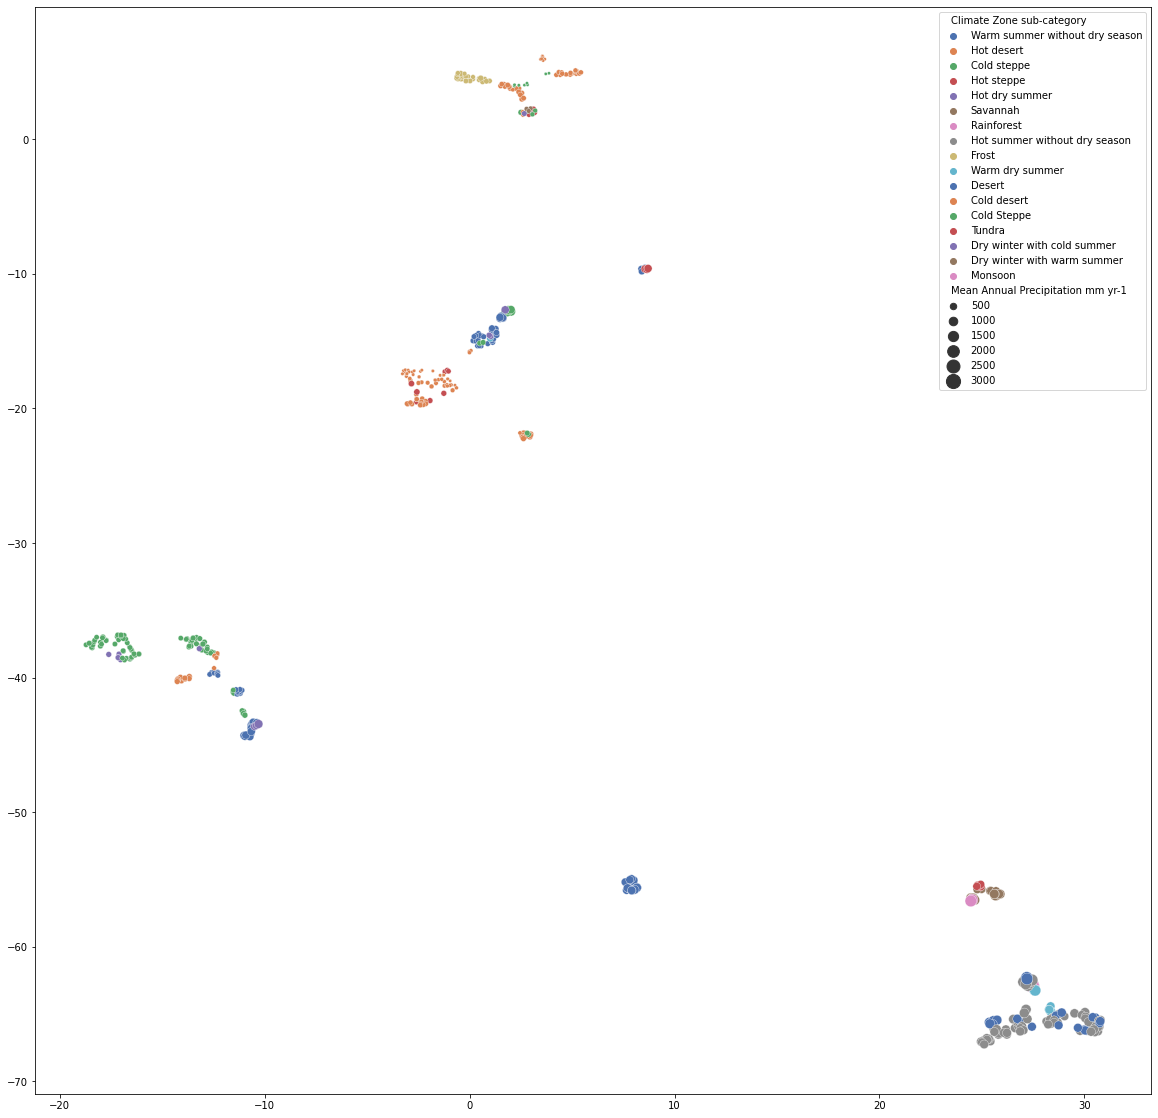

In [95]:
plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],
                hue=data['Climate Zone sub-category'], palette='deep',
                size=data['Mean Annual Precipitation mm yr-1'], sizes=(10, 200)
               )

Text(0.5, 0, 'Epoch')

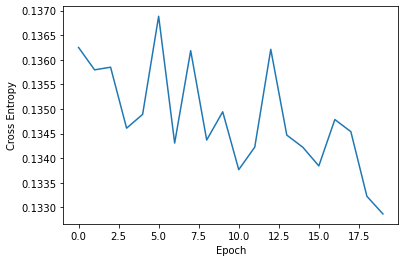

In [53]:
fig, ax = plt.subplots()
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')

# Working with Basin DATA

In [98]:
basin = pd.read_csv('test.csv', header=0, index_col=0) 

In [722]:
X = basin[[
           #'Citation', 
           #'Sample ID',
           #'Location', 
           'Latitude', 
           'Longitude',
           'Elevation m', 
           #'Basin Relief (m)b',
           'Basin Area (km2)c',
           'Mean Latitude (decimal degrees)d',
           'Mean Longitude (decimal degrees)d',
           'Effective Basin Elevation (m)d',
           'Mean Basin Slope (°)e',
           #'Rock Type general',
           'Mean Annual Precipitation (mm yr-1)f',
           'Mean Annual Temperature (°C)f',
           '% Vegetationg',
           'Seismicityh',
           #'Seismic Regimei', 
           #'Climate Zone (Main)j',
           #'Climate Zone (Sub-category)j', 
           'Original 10Be Concentration_at g-1',
           #'Original 10Be Concentration Error_at g-1', 
           #'AMS Standard',
           #'Published Erosion Rate (m My-1)k',
           #'Published Erosion Rate Error (m My-1)k', 
           #'CRONUS Erosion Rate_m My-1',
           'CRONUS Erosion Rate Error_m My-1',
           #'% Difference between Published and CRONUS Erosion Ratesl'

]]

In [738]:
y_erosion = basin[[
           #'Citation', 
           #'Sample ID',
           #'Location', 
           #'Latitude', 
           #'Longitude',
           #'Elevation m', 
           #'Basin Relief (m)b',
           #'Basin Area (km2)c',
           #'Mean Latitude (decimal degrees)d',
           #'Mean Longitude (decimal degrees)d',
           #'Effective Basin Elevation (m)d',
           #'Mean Basin Slope (°)e',
           #'Rock Type general',
           #'Mean Annual Precipitation (mm yr-1)f',
           #'Mean Annual Temperature (°C)f',
           #'% Vegetationg',
           #'Seismicityh',
           #'Seismic Regimei', 
           #'Climate Zone (Main)j',
           #'Climate Zone (Sub-category)j', 
           #'Original 10Be Concentration_at g-1',
           #'Original 10Be Concentration Error_at g-1', 
           #'AMS Standard',
           #'Published Erosion Rate (m My-1)k',
           #'Published Erosion Rate Error (m My-1)k', 
           'CRONUS Erosion Rate_m My-1',
           #'CRONUS Erosion Rate Error_m My-1',
           #'% Difference between Published and CRONUS Erosion Ratesl'

]]

In [732]:
embedding.shape

(1393, 6)

In [723]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()
scaler.fit(X)
data = scaler.transform(X)

In [726]:
X = data[:,:13]
y= data[:,13]



In [350]:
#X_train, X_test, y_train, y_test = train_test_split(X, y)#=np.random.RandomState(0))

pcr = make_pipeline(StandardScaler(), PCA(n_components=3), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

PLSRegression(n_components=3)

In [351]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared 0.037
PLS r-squared 0.155


<AxesSubplot:>

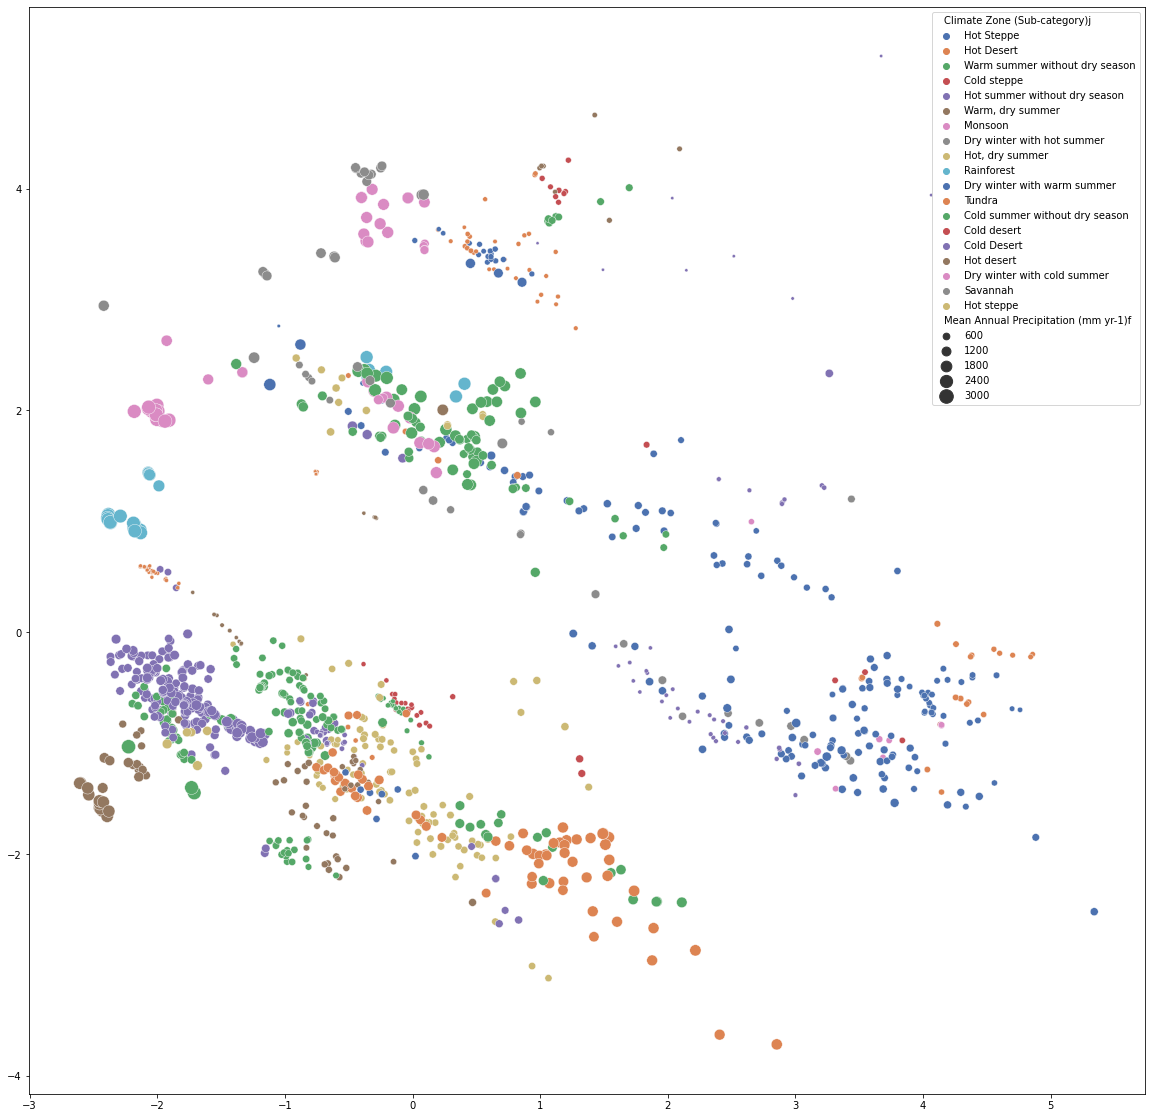

In [213]:
pca = PCA(n_components=2).fit_transform(data)
#sns.scatterplot(pca.explained_variance_ratio_[:] * 100)
plt.figure(figsize = (20,20))
sns.scatterplot(x=pca[:,0],y=pca[:,1],
                hue=basin['Climate Zone (Sub-category)j'],palette='deep',
                size=basin['Mean Annual Precipitation (mm yr-1)f'],sizes=(10, 200)
               )

<AxesSubplot:>

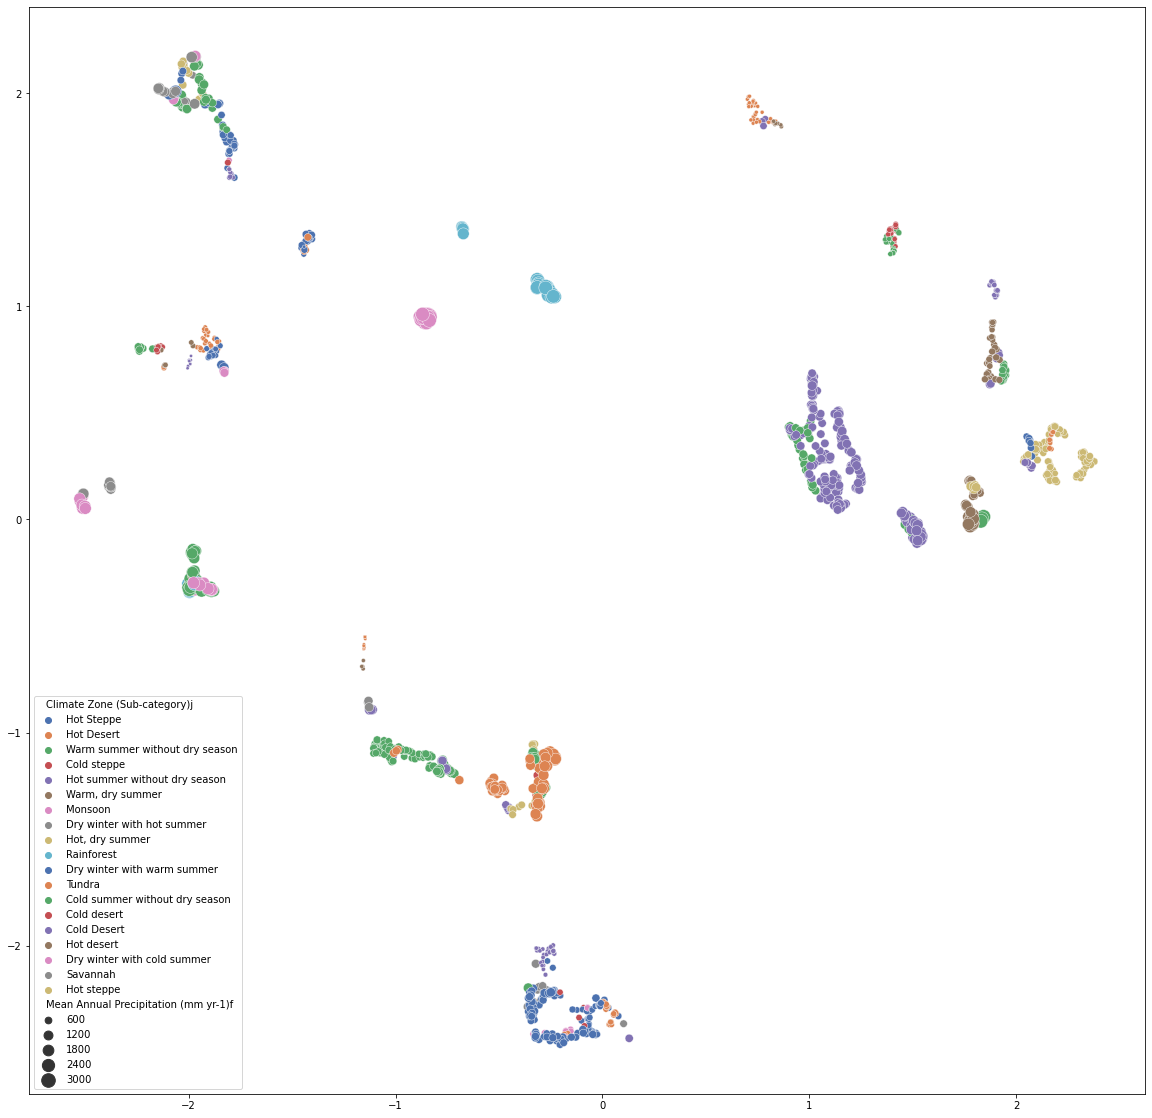

In [339]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
label = basin['Climate Zone (Sub-category)j']

lda = LinearDiscriminantAnalysis(n_components=3)
X_r2 = lda.fit(X, label).transform(X)

plt.figure(figsize = (20,20))
sns.scatterplot(x=X_r2[:,0],y=X_r2[:,1],
                hue=basin['Climate Zone (Sub-category)j'],palette='deep',
                size=basin['Mean Annual Precipitation (mm yr-1)f'],sizes=(10, 200)
               )

In [766]:
from sklearn.metrics import r2_score

In [779]:
from sklearn.svm import SVR
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(embedding, y_erosion)
regr = SVR(C=1500.5225125628141, gamma=.41708542730152,epsilon=.001)
regr.fit(X_train_svr, y_train_svr)
regr.score(X_test_svr, y_test_svr) * 100

/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


47.0421505340112

In [780]:
pred=regr.predict(X_test_svr)


In [805]:
sns.histplot(np.array(y_test_svr)[:] - pred)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa2c0222160> (for post_execute):


KeyboardInterrupt: 

In [802]:
pred.shape

(349,)

<AxesSubplot:>

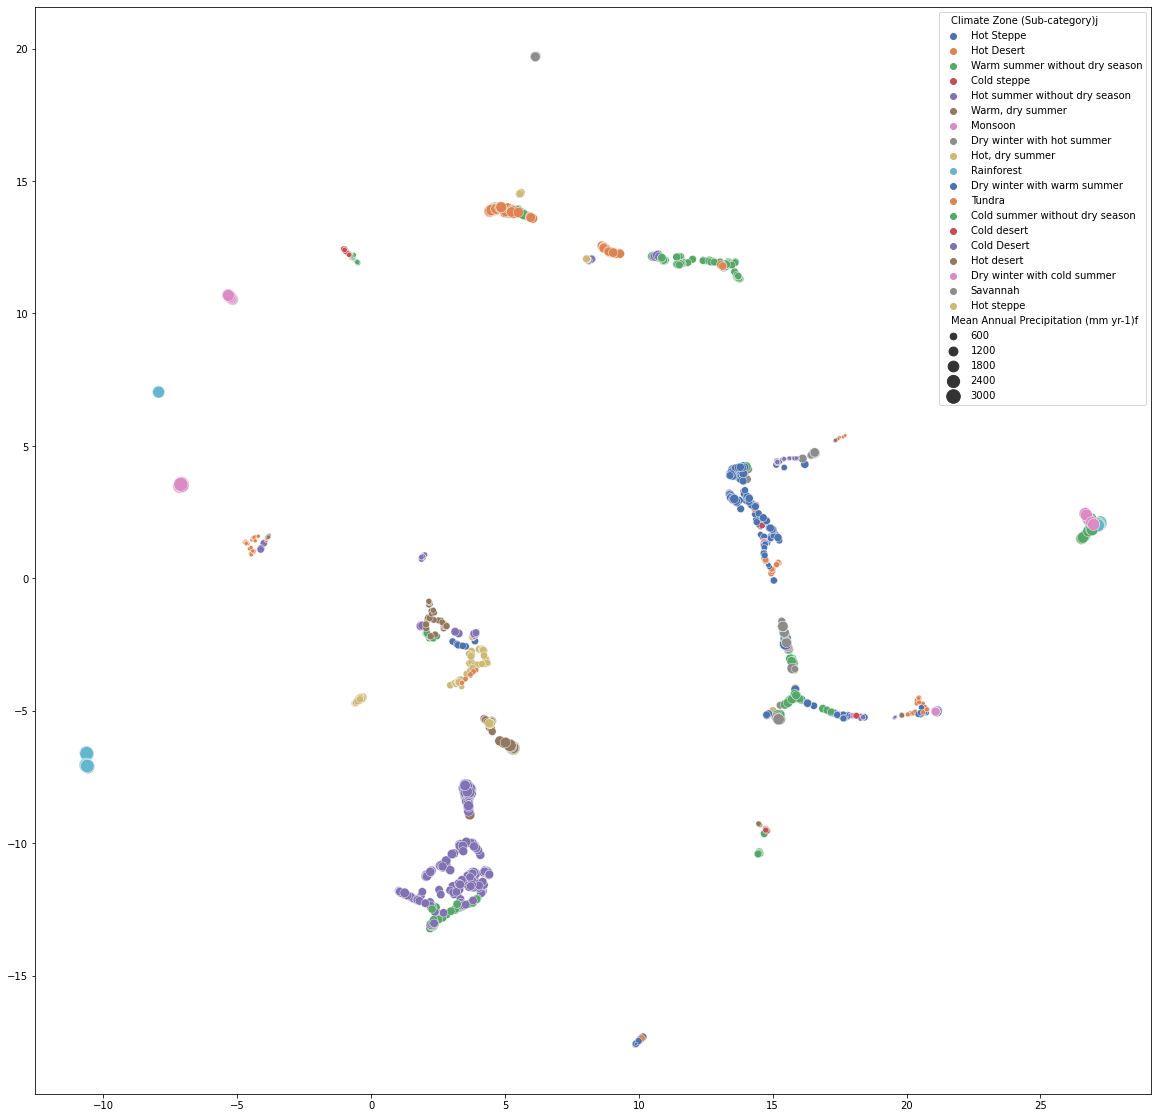

In [329]:
import umap
import matplotlib.pyplot as plt

reducer = umap.UMAP()
embedding = reducer.fit_transform(X,y)
plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],
                hue=basin['Climate Zone (Sub-category)j'], palette='deep',
                size=basin['Mean Annual Precipitation (mm yr-1)f'], sizes=(10, 200))

The best parameters are with a score of ({'C': 502.5225125628141, 'gamma': 0.5025125638090452}, 0.956586644299265)


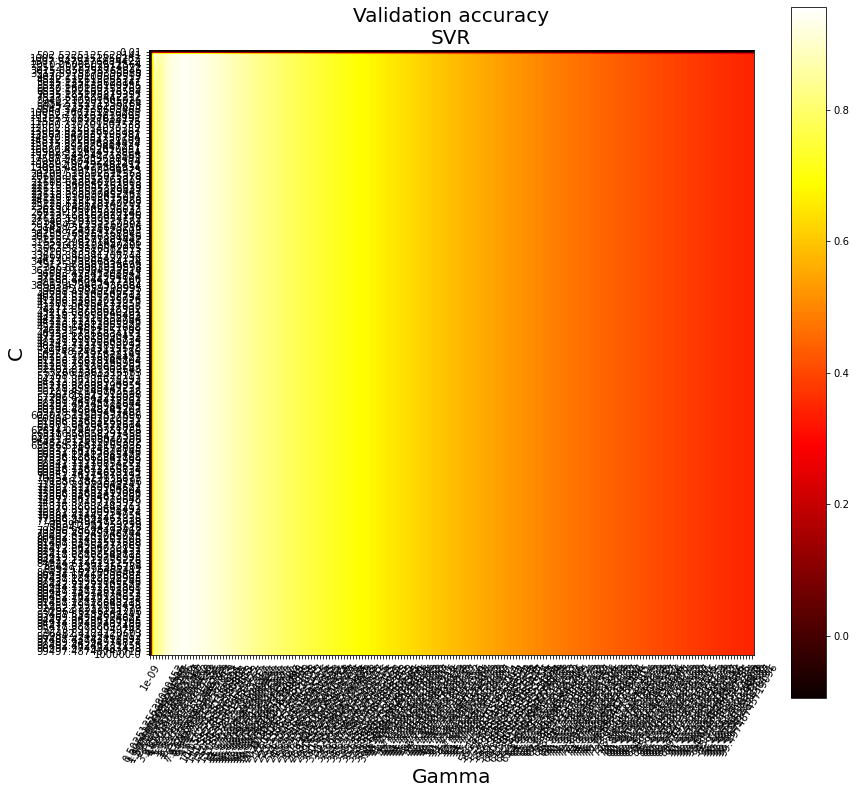

In [712]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.linspace(1e-2, 100000, 200)
gamma_range = np.linspace(1e-09, 100, 200)
param_grid = dict(C=C_range, gamma=gamma_range)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVR(epsilon=.001), param_grid=param_grid, cv=cv)
grid.fit(X_train_svr, y_train_svr)

print("The best parameters are with a score of", (grid.best_params_, grid.best_score_))


scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))
#sns.heatmap(scores,cmap='plasma_r')

plt.figure(figsize=(14, 12))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="kaiser",
    cmap=plt.cm.hot,
    #norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("Gamma",fontsize=20)
plt.ylabel("C",fontsize=20)
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=60)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy\nSVR",fontsize=20)
#plt.savefig('log_cv',dpi=500)
plt.show()

In [718]:
data

array([[-1.27731182, -0.63499352,  1.22805133, ...,  1.55737136,
         1.93192016, -0.39070741],
       [-1.27845071, -0.63621079,  0.40724018, ...,  1.55737136,
        -0.30558812, -0.24543446],
       [-1.28153837, -0.63689871,  0.07067874, ...,  1.54618282,
        -0.3167767 , -0.24170653],
       ...,
       [-1.43978951, -0.44441608, -0.73814129, ...,  0.80521886,
        -0.34490354, -0.12730554],
       [-1.43978951, -0.44441608, -0.73814129, ...,  0.80521886,
        -0.34132941, -0.1525856 ],
       [-1.43978951, -0.44441608, -0.73814129, ...,  0.80521886,
        -0.34847767, -0.09631709]])

/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa1b0577ac0>)
Mon Dec 19 14:35:35 2022 Construct fuzzy simplicial set
Mon Dec 19 14:35:35 2022 Finding Nearest Neighbors
Mon Dec 19 14:35:35 2022 Finished Nearest Neighbor Search
Mon Dec 19 14:35:35 2022 Construct embedding
Epoch 1/10
4106/4106 [==============================] - 12s 3ms/step - loss: 0.1106
Epoch 2/10
4106/4106 [==============================] - 11s 3ms/step - loss: 0.0834
Epoch 3/10
4106/4106 [==============================] - 11s 3ms/step - loss: 0.0824
Epoch 4/10
4106/4106 [==============================] - 11s 3ms/step - loss: 0.0813
Epoch 5/10
4106/4106 [==============================] - 11s 3ms/step - loss: 0.0808
Epoch 6/10
4106/4106 [==============================] - 12s 3ms/step - loss: 0.0804
Epoch 7/10
4106/4106 [==============================] - 11s 3ms/step - loss: 0.0802
Epoch 8/10
4106/4106 [==============================] - 11s 3ms/step - loss: 0.0799
Epoch 9/10
4106/41

<AxesSubplot:>

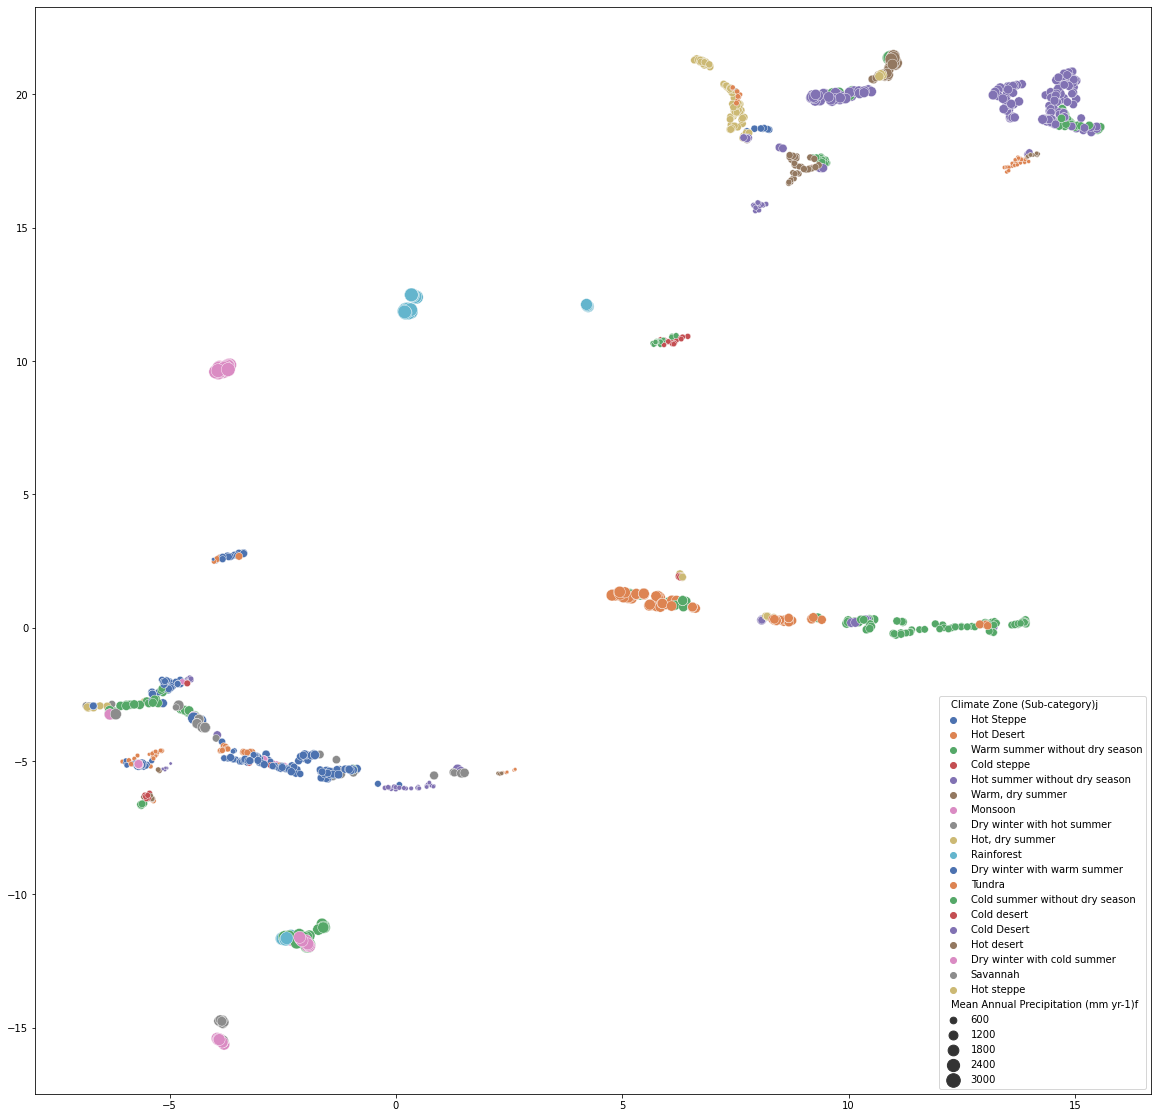

In [733]:
embedder = ParametricUMAP(n_epochs = 5000, verbose=True,n_components=6)
embedding = embedder.fit_transform(X)

plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],
                hue=basin['Climate Zone (Sub-category)j'], palette='deep',
                size=basin['Mean Annual Precipitation (mm yr-1)f'], sizes=(10, 200))

In [353]:
basin.columns

Index(['Citation', 'Sample ID', 'Location', 'Latitude', 'Longitude',
       'Elevation m', 'Basin Relief (m)b', 'Basin Area (km2)c',
       'Mean Latitude (decimal degrees)d', 'Mean Longitude (decimal degrees)d',
       'Effective Basin Elevation (m)d', 'Mean Basin Slope (°)e',
       'Rock Type general', 'Mean Annual Precipitation (mm yr-1)f',
       'Mean Annual Temperature (°C)f', '% Vegetationg', 'Seismicityh',
       'Seismic Regimei', 'Climate Zone (Main)j',
       'Climate Zone (Sub-category)j', 'Original 10Be Concentration_at g-1',
       'Original 10Be Concentration Error_at g-1', 'AMS Standard',
       'Published Erosion Rate (m My-1)k',
       'Published Erosion Rate Error (m My-1)k', 'CRONUS Erosion Rate_m My-1',
       'CRONUS Erosion Rate Error_m My-1',
       '% Difference between Published and CRONUS Erosion Ratesl'],
      dtype='object')

In [866]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y)

In [370]:
n_components = 2
encoder = tf.keras.Sequential([
                          
    
    tf.keras.layers.Dense(128,input_dim = 13, activation='relu'),  # hidden layer (2)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    tf.keras.layers.Dense(units = n_components) # output layer (3)

])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 100)               12900     
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 101       
Total params: 31,305
Trainable params: 31,305
Non-trainable params: 0
_________________________________________________________________


In [359]:
#dims = (28,28, 1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_15 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 258       
Total params: 437,122
Trainable params: 437,122
Non-trainable params: 0
_______________________________________________

In [379]:
embedder = ParametricUMAP(
    encoder=encoder,
    #decoder=decoder,
    #dims=dims,
    n_components=n_components,
    n_training_epochs=2, # dicates how many total training epochs to run
    n_epochs = 5000, # dicates how many times edges are trained per 'epoch' to keep consistent with non-parametric UMAP
    parametric_reconstruction= False,
    reconstruction_validation=X_test,
    #parametric_reconstruction_loss_fcn = tf.keras.losses.MSE,
    verbose=True,
)


/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


In [380]:
embedding = embedder.fit_transform(X_train)


ParametricUMAP(encoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fa238dbe280>, n_training_epochs=2, optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa2391aed60>, reconstruction_validation=array([[-1.71902894, -0.48269872, -0.39174309, ..., 1.2278465 ,
         0.27695014, -0.34547333],
       [ 0.29427887, 1.52430822, 1.93875123, ..., -0.52842113,
         0.36361596, 0.18629489],
       [-2.06494137, 1.89766232, -0.62904023, ..., -1.28649203,
        -0.3237867 , 3.76353172],
       ...,
       [ 0.20401114, 1.47781109, 2.59783041, ..., -1.27580536,
        -0.10888229, 1.81531447],
       [ 0.42629247, -0.67877343, -0.34527883, ..., 1.24472434,
        -0.54142899, -0.00950521],
       [ 0.89153909, 0.41626251, 0.49310003, ..., -0.88461293,
        -0.2325664 , -0.33304157]]))
Sat Dec 17 14:20:40 2022 Construct fuzzy simplicial set
Sat Dec 17 14:20:40 2022 Finding Nearest Neighbors
Sat Dec 17 14:20:40 2022 Finished Nearest Neighbor Sear

In [414]:
X_train_svc

NameError: name 'X_train_svc' is not defined

In [864]:
X = data[:,:13]
y= data[:,13]


X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y)

(1393, 13)

# messing with nn

In [3]:
X = basin[[
           #'Citation', 
           #'Sample ID',
           #'Location', 
           'Latitude', 
           'Longitude',
           'Elevation m', 
           #'Basin Relief (m)b',
           'Basin Area (km2)c',
           #'Mean Latitude (decimal degrees)d',
           #'Mean Longitude (decimal degrees)d',
           #'Effective Basin Elevation (m)d',
           'Mean Basin Slope (°)e',
           #'Rock Type general',
           'Mean Annual Precipitation (mm yr-1)f',
           'Mean Annual Temperature (°C)f',
           '% Vegetationg',
           'Seismicityh',
           #'Seismic Regimei', 
           #'Climate Zone (Main)j',
           #'Climate Zone (Sub-category)j', 
           'Original 10Be Concentration_at g-1',
           #'Original 10Be Concentration Error_at g-1', 
           #'AMS Standard',
           #'Published Erosion Rate (m My-1)k',
           #'Published Erosion Rate Error (m My-1)k', 
           #'CRONUS Erosion Rate_m My-1',
           'CRONUS Erosion Rate Error_m My-1',
           #'% Difference between Published and CRONUS Erosion Ratesl'

]]

NameError: name 'basin' is not defined

In [893]:
y = basin[[
           #'Citation', 
           #'Sample ID',
           #'Location', 
           #'Latitude', 
           #'Longitude',
           #'Elevation m', 
           #'Basin Relief (m)b',
           #'Basin Area (km2)c',
           #'Mean Latitude (decimal degrees)d',
           #'Mean Longitude (decimal degrees)d',
           #'Effective Basin Elevation (m)d',
           #'Mean Basin Slope (°)e',
           #'Rock Type general',
           #'Mean Annual Precipitation (mm yr-1)f',
           #'Mean Annual Temperature (°C)f',
           #'% Vegetationg',
           #'Seismicityh',
           #'Seismic Regimei', 
           #'Climate Zone (Main)j',
           #'Climate Zone (Sub-category)j', 
           #'Original 10Be Concentration_at g-1',
           #'Original 10Be Concentration Error_at g-1', 
           #'AMS Standard',
           #'Published Erosion Rate (m My-1)k',
           #'Published Erosion Rate Error (m My-1)k', 
           #'CRONUS Erosion Rate_m My-1',
           'CRONUS Erosion Rate Error_m My-1',
           #'% Difference between Published and CRONUS Erosion Ratesl'

]]

In [1127]:
scaler = StandardScaler()
scaler.fit(X)
data = scaler.transform(X)

Xsc = data[:,:10]
ysc= data[:,10]

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(Xsc, ysc)

In [1134]:
n_components = 10
model = tf.keras.Sequential([
                          
    
    tf.keras.layers.Dense(128,input_dim = 10, activation='relu'),  # hidden layer (2)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(units = 1) # output layer (3)

])
model.summary()

Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_463 (Dense)            (None, 128)               1408      
_________________________________________________________________
dense_464 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_465 (Dense)            (None, 120)               15480     
_________________________________________________________________
dense_466 (Dense)            (None, 128)               15488     
_________________________________________________________________
dense_467 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_468 (Dense)            (None, 1)                 129       
Total params: 65,529
Trainable params: 65,529
Non-trainable params: 0
________________________________________________

In [1147]:
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
               optimizer = tf.keras.optimizers.Adam(learning_rate=.00001), #stochastic GD
               metrics = ['mae'])


history = model.fit( X_train_nn, y_train_nn, epochs = 10000,verbose=0,batch_size=200)
pred = model.predict(X_test_nn)
r2_score(y_test_nn, pred) * 100

44.058253705552886

dict_keys(['loss', 'mae'])


KeyError: 'val_loss'

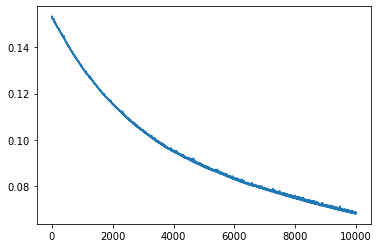

In [1148]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1149]:
scaler = StandardScaler()
scaler.fit(X)
data = scaler.transform(X)

Xsc = data[:,:10]
ysc= data[:,10]

#X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(Xsc, ysc)

/home/jmm688/conda/miniconda3/envs/tf/lib/python3.9/site-packages/umap/parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fa1a013ca00>)
Mon Dec 19 15:59:27 2022 Construct fuzzy simplicial set
Mon Dec 19 15:59:27 2022 Finding Nearest Neighbors
Mon Dec 19 15:59:27 2022 Finished Nearest Neighbor Search
Mon Dec 19 15:59:27 2022 Construct embedding
Epoch 1/10
4109/4109 [==============================] - 13s 3ms/step - loss: 0.1215
Epoch 2/10
4109/4109 [==============================] - 12s 3ms/step - loss: 0.0859
Epoch 3/10
4109/4109 [==============================] - 12s 3ms/step - loss: 0.0839
Epoch 4/10
4109/4109 [==============================] - 11s 3ms/step - loss: 0.0829
Epoch 5/10
4109/4109 [==============================] - 11s 3ms/step - loss: 0.0821
Epoch 6/10
4109/4109 [==============================] - 11s 3ms/step - loss: 0.0818
Epoch 7/10
4109/4109 [==============================] - 11s 3ms/step - loss: 0.0819
Epoch 8/10
4109/4109 [==============================] - 11s 3ms/step - loss: 0.0812
Epoch 9/10
4109/41

<AxesSubplot:>

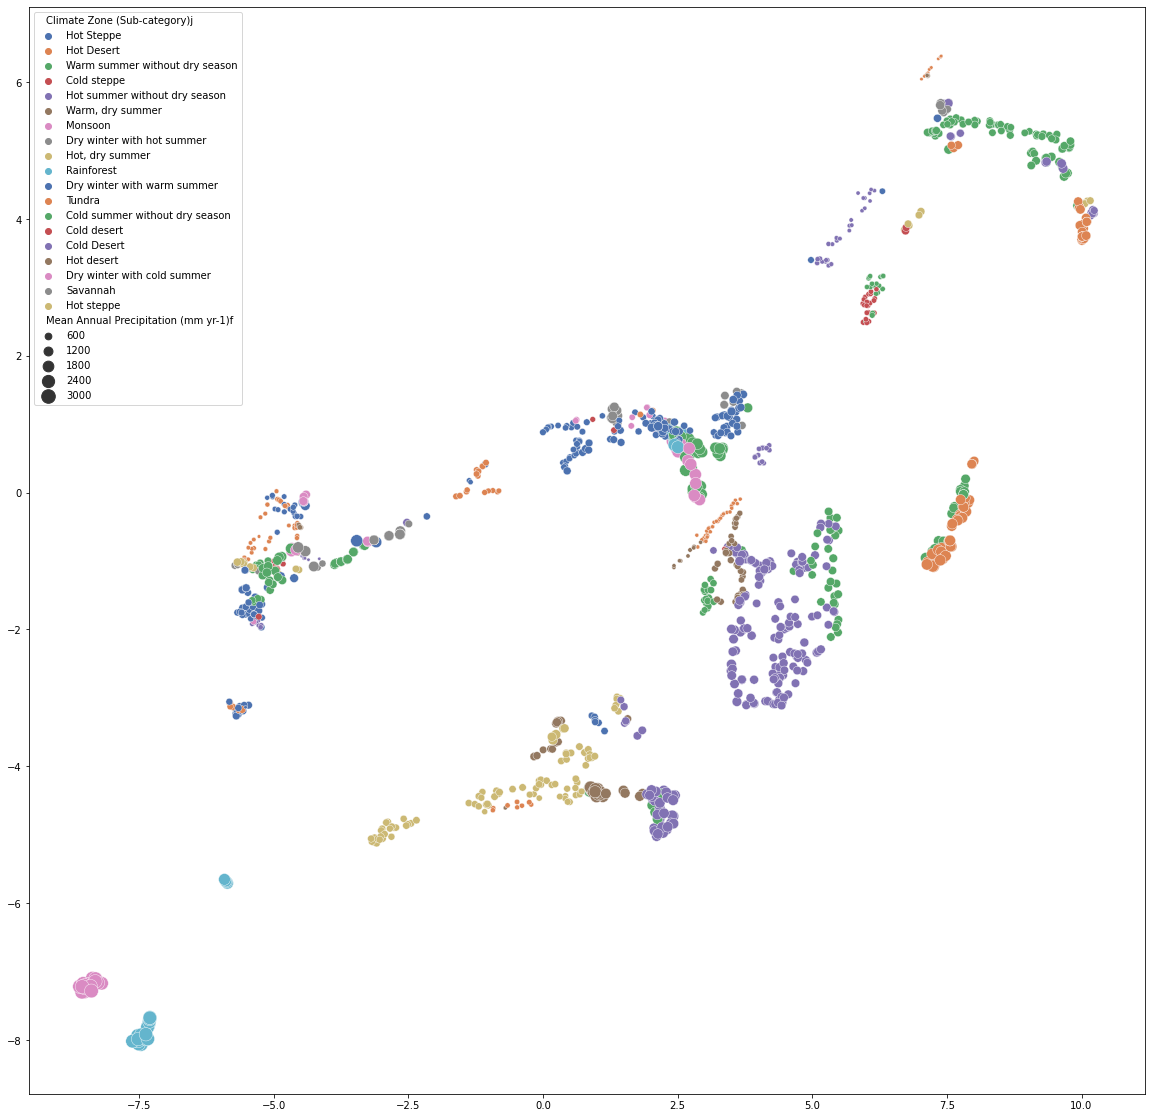

In [1200]:
embedder = ParametricUMAP(n_epochs = 5000, verbose=True,n_components=4)
embedding = embedder.fit_transform(Xsc)

plt.figure(figsize = (20,20))
sns.scatterplot(x = embedding[:,0], y = embedding[:,1],
                hue=basin['Climate Zone (Sub-category)j'], palette='deep',
                size=basin['Mean Annual Precipitation (mm yr-1)f'], sizes=(10, 200))

In [1202]:
embedding.shape

(1393, 4)

In [1203]:

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(embedding, ysc)

In [1206]:
n_components = 4
model = tf.keras.Sequential([
                          
    
    tf.keras.layers.Dense(128,input_dim = 4, activation='relu'),  # hidden layer (2)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(units = 1) # output layer (3)

])
model.summary()

Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_520 (Dense)            (None, 128)               640       
_________________________________________________________________
dense_521 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_522 (Dense)            (None, 120)               15480     
_________________________________________________________________
dense_523 (Dense)            (None, 128)               15488     
_________________________________________________________________
dense_524 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_525 (Dense)            (None, 1)                 129       
Total params: 64,761
Trainable params: 64,761
Non-trainable params: 0
________________________________________________

In [1229]:
model.compile( loss = tf.keras.losses.mse, #mae stands for mean absolute error
               optimizer = tf.keras.optimizers.Adam(learning_rate=.00001), #stochastic GD
               metrics = ['mse'])


history = model.fit( X_train_nn, y_train_nn, epochs = 20000,verbose=0,batch_size=200)
pred = model.predict(X_test_nn)
r2_score(y_test_nn, pred) * 100

54.92703588380263

dict_keys(['loss', 'mse'])


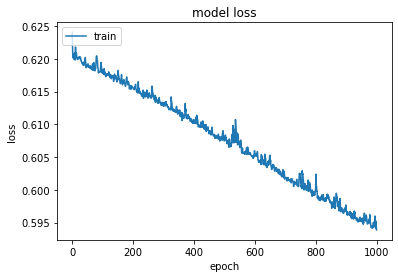

In [1225]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
#plt.plot(history.history['mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [1214]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [1227]:
regr = SVR(C=1500.5225125628141, gamma=.41708542730152,epsilon=.001)
regr.fit(X_train_nn, y_train_nn)
regr.score(X_test_nn, y_test_nn) * 100

48.267086739949896

The best parameters are with a score of ({'C': 502.5225125628141, 'gamma': 93.46733668348242}, 0.3837809693640466)


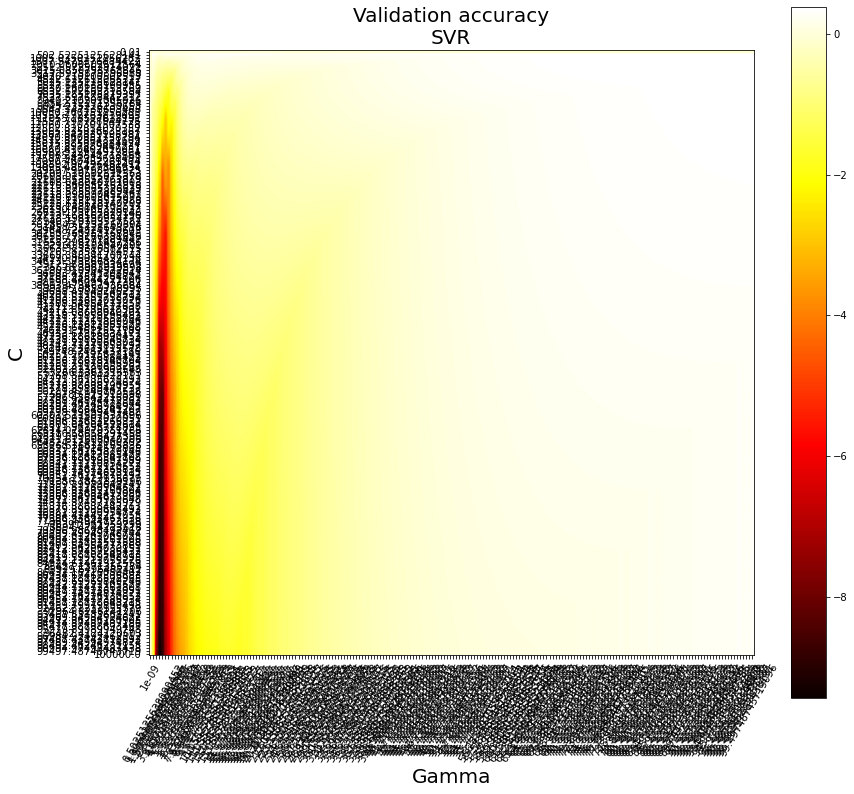

In [1228]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.linspace(1e-2, 100000, 200)
gamma_range = np.linspace(1e-09, 100, 200)
param_grid = dict(C=C_range, gamma=gamma_range)
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
grid = GridSearchCV(SVR(epsilon=.001), param_grid=param_grid, cv=cv)
grid.fit(X_train_nn, y_train_nn)

print("The best parameters are with a score of", (grid.best_params_, grid.best_score_))


scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))
#sns.heatmap(scores,cmap='plasma_r')

plt.figure(figsize=(14, 12))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="kaiser",
    cmap=plt.cm.hot,
    #norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("Gamma",fontsize=20)
plt.ylabel("C",fontsize=20)
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=60)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy\nSVR",fontsize=20)
#plt.savefig('log_cv',dpi=500)
plt.show()